In [31]:
import os
import datetime
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',50)
import matplotlib.pyplot as plt
import tqdm
import warnings
warnings.filterwarnings('ignore')

In [72]:
data_path = 'C:/users/yuxuan.huang/OneDrive - SAIF/tower data/'

先看单只合约

In [74]:
exchanges = os.listdir(data_path)
exchanges

['CZCE', 'DCE', 'SHFE']

In [75]:
exchange = 'CZCE/'

苹果期货: 每年发行7期, 到期月分别为1,3,4,5,10,11,12月, 交割日为到到期月的第10个交易日

In [77]:
bid = 'AP'

contract_list = os.listdir(data_path+exchange+bid)
contract_list

['AP2305.parquet',
 'AP2310.parquet',
 'AP2311.parquet',
 'AP2312.parquet',
 'AP2401.parquet',
 'AP2403.parquet',
 'AP2404.parquet',
 'AP2405.parquet',
 'AP2410.parquet',
 'AP2411.parquet',
 'AP2412.parquet']

In [79]:
dfs = {}
for contract in contract_list:
    df = pd.read_parquet('data/'+bid+'/'+contract)
    df = df[(df.index.time >= pd.to_datetime('08:59').time()) & 
                 (df.index.time <= pd.to_datetime('15:00').time())]
    df.contract = contract[:6]
    dfs[df.contract] = df

不同合约交易量的变化

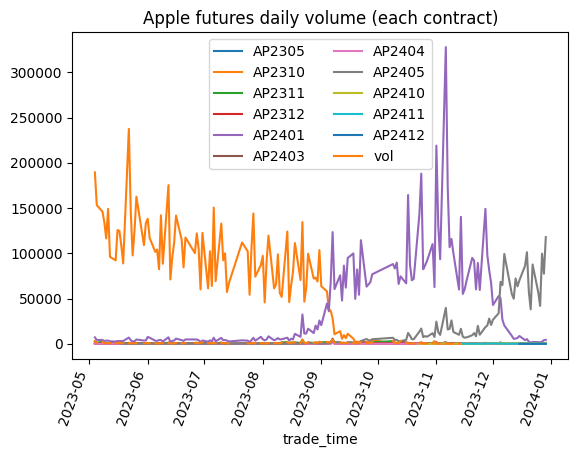

In [116]:
for df in dfs.values():
    vol_by_day = df.resample('1D')['vol'].last()
    vol_by_day = vol_by_day[vol_by_day>0]
    plt.plot(vol_by_day,label=df.contract)
plt.legend(ncol=2)
plt.xticks(rotation=70)
plt.title('Apple futures daily volume (each contract)')
plt.show()

<Axes: xlabel='trade_time'>

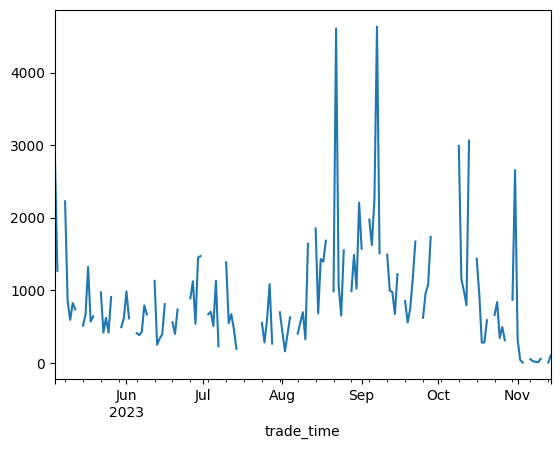

In [115]:
dfs['AP2311'].resample('1D')['vol'].last().plot()

同一品种不同到期日的合约的价格存在期限结构

In [106]:
close_2401 = dfs['AP2401'].resample('1D')['last_price'].last().dropna().loc['2023-09-01':'2023-12-31']
close_2405 = dfs['AP2405'].resample('1D')['last_price'].last().dropna().loc['2023-09-01':'2023-12-31']
price_spread = (close_2401 - close_2405)
price_spread

trade_time
2023-09-01 00:00:00+08:00     -3.0
2023-09-04 00:00:00+08:00      9.0
2023-09-05 00:00:00+08:00     29.0
2023-09-06 00:00:00+08:00     49.0
2023-09-07 00:00:00+08:00     -9.0
                             ...  
2023-12-25 00:00:00+08:00    798.0
2023-12-26 00:00:00+08:00    808.0
2023-12-27 00:00:00+08:00    800.0
2023-12-28 00:00:00+08:00    663.0
2023-12-29 00:00:00+08:00    537.0
Name: last_price, Length: 79, dtype: float64

<Axes: xlabel='trade_time'>

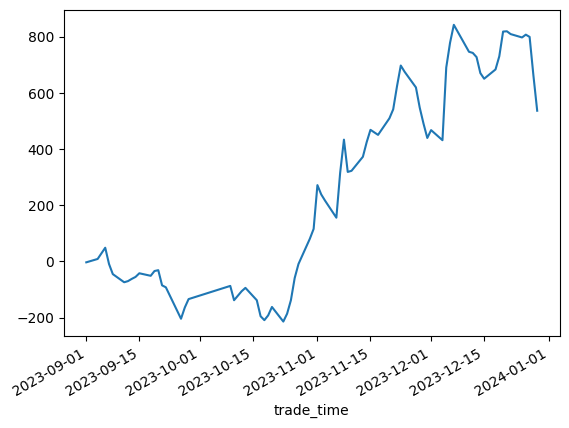

In [107]:
price_spread.plot()

In [95]:
dfs['AP2405'].loc['2023-11-30']['last_price'].iloc[-1]

8705.0

棉纱期货: 每个月都有新发合约

In [63]:
bid = 'CY'

contract_list = os.listdir('data/'+bid)

dfs = []
for contract in contract_list:
    df = pd.read_parquet('data/'+bid+'/'+contract)
    df = df[(df.index.time >= pd.to_datetime('08:59').time()) & 
                 (df.index.time <= pd.to_datetime('15:00').time())]
    df.contract = contract[:6]
    dfs.append(df)

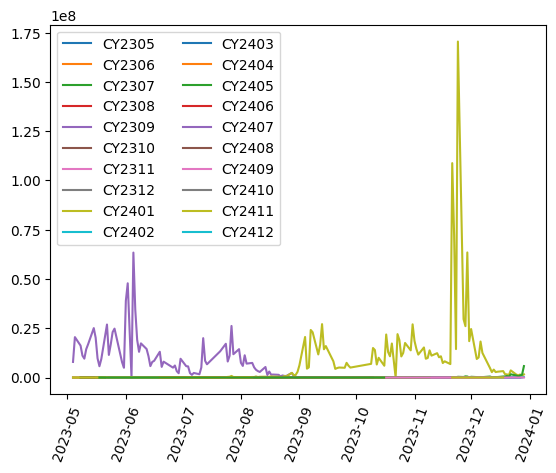

In [66]:
for df in dfs:
    vol_by_day = df.resample('1D')['vol'].sum()
    vol_by_day = vol_by_day[vol_by_day>0]
    plt.plot(vol_by_day,label=df.contract)
plt.legend(ncol=2)
plt.xticks(rotation=70)
plt.show()